In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import os

import warnings
warnings.filterwarnings("ignore")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


#### Setting image path 

In [2]:
img_path = '/Users/prathamesh/Desktop/brain_tumor_dataset'

In [3]:
img_path_test ='/Users/prathamesh/Desktop/brain_tumor_dataset copy'

In [4]:
os.listdir(img_path_test)

['Tumor Detected', 'Tumor Not Detected']

In [5]:
os.listdir(img_path)

['Tumor Detected', 'Tumor Not Detected']

In [6]:
len(os.listdir(img_path+'/Tumor Detected'))

155

In [7]:
len(os.listdir(img_path+'/Tumor Not Detected'))

98

#### viewing image

In [9]:
os.listdir(img_path+'/Tumor Detected')[0]

'Y157.JPG'

In [10]:
detected = img_path+'/Tumor Detected/Y157.JPG'

In [11]:
detected = imread(detected)

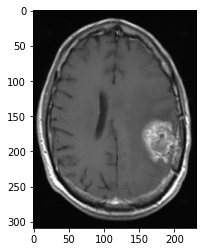

In [12]:
plt.imshow(detected)

In [13]:
detected.shape

(309, 232, 3)

In [14]:
os.listdir(img_path+'/Tumor Not Detected')[0]

'30 no.jpg'

In [15]:
not_detected = img_path+'/Tumor Not Detected/30 no.jpg'

In [16]:
not_detected = imread(not_detected)

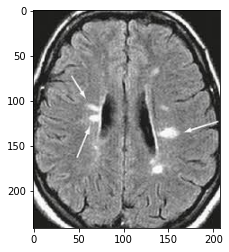

In [17]:
plt.imshow(not_detected)

In [18]:
not_detected.shape

(242, 208, 3)

In [19]:
from keras.preprocessing.image import ImageDataGenerator

2023-10-28 19:50:08.322455: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
image_gen = ImageDataGenerator()

In [21]:
image_gen.flow_from_directory(img_path)

Found 253 images belonging to 2 classes.


In [22]:
image_gen2 = ImageDataGenerator(rotation_range=30, # rotate the image 20 degrees
                               width_shift_range=0.15, # Shift the pic width by a max of 5%
                               height_shift_range=0.15, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [23]:
image_gen.flow_from_directory(img_path_test)

Found 253 images belonging to 2 classes.


### Creating model

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Conv2D,MaxPooling2D,Flatten

In [25]:
model = Sequential()
model.add(Conv2D(filters=20,kernel_size=3,input_shape=(250,250,1),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=30,kernel_size=3,input_shape=(250,250,1),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=30,kernel_size=3,input_shape=(250,250,1),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(100,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


#### Bringing images in batch from source directory

In [26]:
train_img_gen = image_gen.flow_from_directory(img_path,target_size=(250,250),color_mode='grayscale',batch_size=10,class_mode='binary')

Found 253 images belonging to 2 classes.


In [27]:
train_img_gen.class_indices

{'Tumor Detected': 0, 'Tumor Not Detected': 1}

In [28]:
test_img_gen = image_gen.flow_from_directory(img_path_test,target_size=(250,250),color_mode='grayscale',batch_size=10,class_mode='binary')

Found 253 images belonging to 2 classes.


In [29]:
test_img_gen.class_indices

{'Tumor Detected': 0, 'Tumor Not Detected': 1}

### Training model

In [30]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=2)


In [31]:
model.fit_generator(train_img_gen,epochs=50,validation_data=test_img_gen,callbacks=[early_stop])

Epoch 1/50
26/26 [==============================] - 15s 510ms/step - loss: 20.0730 - accuracy: 0.6759 - val_loss: 0.6653 - val_accuracy: 0.8221
Epoch 2/50
26/26 [==============================] - 16s 631ms/step - loss: 0.6315 - accuracy: 0.7668 - val_loss: 0.3692 - val_accuracy: 0.8419
Epoch 3/50
26/26 [==============================] - 14s 532ms/step - loss: 0.3685 - accuracy: 0.8419 - val_loss: 0.1998 - val_accuracy: 0.9091
Epoch 4/50
26/26 [==============================] - 14s 538ms/step - loss: 0.2630 - accuracy: 0.9091 - val_loss: 0.1218 - val_accuracy: 0.9644
Epoch 5/50
26/26 [==============================] - 14s 538ms/step - loss: 0.2074 - accuracy: 0.9407 - val_loss: 0.0930 - val_accuracy: 0.9881
Epoch 6/50
26/26 [==============================] - 14s 539ms/step - loss: 0.2039 - accuracy: 0.9368 - val_loss: 0.1291 - val_accuracy: 0.9881
Epoch 7/50
26/26 [==============================] - 14s 545ms/step - loss: 0.2140 - accuracy: 0.9447 - val_loss: 0.0895 - val_accuracy: 0.984

In [32]:
losses = pd.DataFrame(model.history.history)

In [33]:
losses

,loss,accuracy,val_loss,val_accuracy
0,20.072968,0.675889,0.665335,0.822134
1,0.631545,0.766798,0.369191,0.841897
2,0.368530,0.841897,0.199786,0.909091
3,0.262968,0.909091,0.121759,0.964427
4,0.207379,0.940711,0.092966,0.988142
5,0.203881,0.936759,0.129080,0.988142
6,0.213996,0.944664,0.089532,0.984190
7,0.159061,0.940711,0.075965,0.984190
8,0.141383,0.968379,0.050566,0.980237
9,0.064816,0.988142,0.024332,1.000000


<AxesSubplot:>

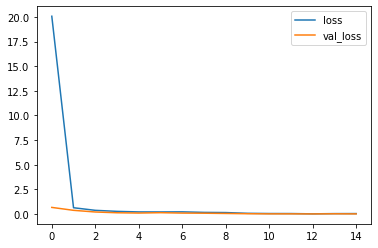

In [34]:
losses[['loss','val_loss']].plot()

In [35]:
model.evaluate_generator(test_img_gen)

[0.006109749432653189, 1.0]

### Evaluating model

In [68]:
def predict(path):
    img = cv2.imread(path)
    print(plt.imshow(img))
    plt.show()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(250,250))
    img = np.expand_dims(img, axis=0)
    prob = model.predict(img,verbose=0)
    #print("PROBABILITY : ",np.round(prob,3))
    if prob < 0.5:
        print("RESULT : Tumor Detected")
    else:
        print("RESULT : Tumor Not Detected")

AxesImage(54,36;334.8x217.44)


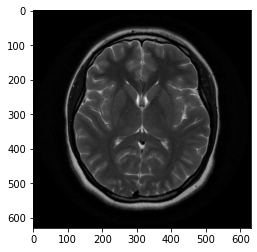

RESULT : Tumor Not Detected


In [69]:
predict(img_path+'/Tumor Not Detected/1 no.jpeg')

AxesImage(54,36;334.8x217.44)


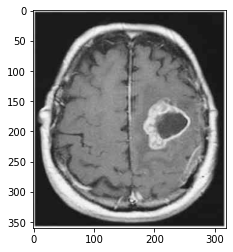

RESULT : Tumor Detected


In [70]:
predict(img_path+'/Tumor Detected/Y10.jpg')

# 